1.Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

2.Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

3.Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import numpy as np
import warnings
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('StudentsPerformance.csv')
df

Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [0]:
student = df.copy()

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


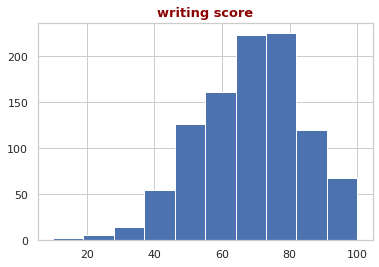

In [4]:
plt.hist(student['writing score'])
plt.title('writing score', fontdict=title_font)
plt.show()

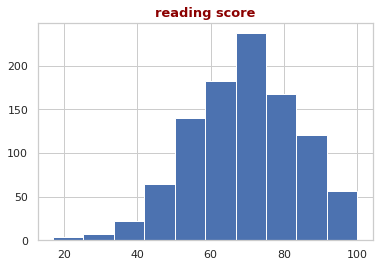

In [5]:
plt.hist(student['reading score'])
plt.title('reading score', fontdict=title_font)
plt.show()

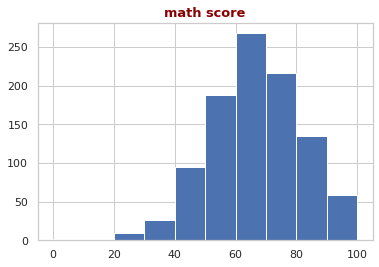

In [6]:
plt.hist(student['math score'])
plt.title('math score', fontdict=title_font)
plt.show()

Although they have a bell shape they look scewed, we need to use Jarque-Bera and Normal tests

In [7]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

tests = ["math score","reading score", "writing score"]
spread_test = pd.DataFrame(columns=["test", "jarque_bera_stats", "jarque_bera_p_value", 
                                         "normal_stats", "normal_p_value"])

for test in tests:
    jb_stats = jarque_bera(np.log(student[test]))
    norm_stats = normaltest(np.log(student[test]))
    spread_test = spread_test.append({"test": test,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
spread_test

,test,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,nan,nan,nan,nan
1,reading score,495.12732,0.00000,209.77151,0.00000
2,writing score,1410.93701,0.00000,318.96921,0.00000


Normal P value is 0, it means that it is not distributed normally. 

In [8]:
# To normalize we need to import normalize from sklearn.

from sklearn.preprocessing import normalize

student["norm_math score"] = normalize(np.array(student["math score"]).reshape(1,-1)).reshape(-1,1)
student["norm_reading score"] = normalize(np.array(student["reading score"]).reshape(1,-1)).reshape(-1,1)
student["norm_writing score"] = normalize(np.array(student["writing score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["math score","norm_math score","reading score","norm_reading score",
                    "writing score","norm_writing score"]


print('Minimum Value\n-----------------',)
print(student[normal_ozellikler].min())
print('\nMaximum value\n-----------------',)
print(student[normal_ozellikler].max())

Minimum Value
-----------------
math score            0.00000
norm_math score       0.00000
reading score        17.00000
norm_reading score    0.00760
writing score        10.00000
norm_writing score    0.00454
dtype: float64

Maximum value
-----------------
math score           100.00000
norm_math score        0.04664
reading score        100.00000
norm_reading score     0.04473
writing score        100.00000
norm_writing score     0.04535
dtype: float64


Now we need to standardize

In [9]:
from sklearn.preprocessing import scale

student["scaled_math score"] = scale(student["math score"])
student["scaled_reading score"] = scale(student["reading score"])
student["scaled_writing score"] = scale(student["writing score"])
scaled_tests=["math score","scaled_math score","reading score",
                    "scaled_reading score","writing score", "scaled_writing score"]
print('Standard Deviations\n-----------------',)
print(student[scaled_tests].std())
print('\nMean\n-----------------',)
print(student[scaled_tests].mean())

Standard Deviations
-----------------
math score             15.16308
scaled_math score       1.00050
reading score          14.60019
scaled_reading score    1.00050
writing score          15.19566
scaled_writing score    1.00050
dtype: float64

Mean
-----------------
math score             66.08900
scaled_math score       0.00000
reading score          69.16900
scaled_reading score    0.00000
writing score          68.05400
scaled_writing score   -0.00000
dtype: float64


Lets see if it is normalized through histograms 

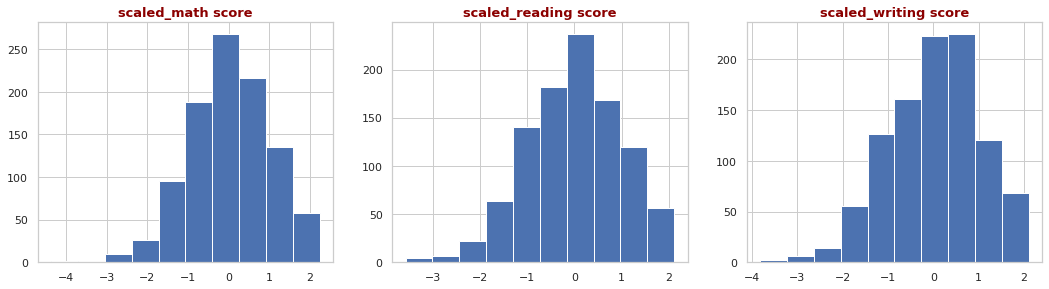

In [10]:
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(student['scaled_math score'])
plt.title('scaled_math score', fontdict=title_font)
    
plt.subplot(3, 3, 2)
plt.hist(student['scaled_reading score'])
plt.title('scaled_reading score', fontdict=title_font)
    
plt.subplot(3, 3, 3)
plt.hist(student['scaled_writing score'])
plt.title('scaled_writing score', fontdict=title_font)

plt.show()

2

In [11]:
math = student ['math score']
reading = student ['reading score']
writing = student ['writing score']
student ['target variable'] = (math+reading+writing)/3
target = student ['target variable']
target.head()

0   72.66667
1   82.33333
2   92.66667
3   49.33333
4   76.33333
Name: target variable, dtype: float64

<bound method Series.mean of 0     72.66667
1     82.33333
2     92.66667
3     49.33333
4     76.33333
        ...   
995   94.00000
996   57.33333
997   65.00000
998   74.33333
999   83.00000
Name: target variable, Length: 1000, dtype: float64>

Let's have an overview of if it is normally distributed through histogram 

Text(0.5, 1.0, 'target variable')

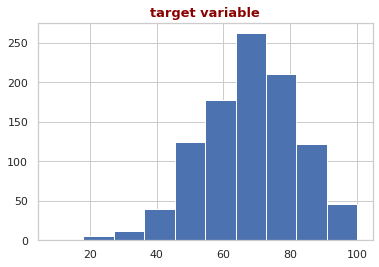

In [12]:
plt.hist(target)
plt.title('target variable', fontdict=title_font)

It looks to have a normal distribution despite being scewed towards left. Time for jarque bera 

In [13]:
pd.options.display.float_format = '{:.5f}'.format

tests = ["target variable"]
spread_test = pd.DataFrame(columns=["test", "jarque_bera_stats", "jarque_bera_p_value", 
                                         "normal_stats", "normal_p_value"])

for test in tests:
    jb_stats = jarque_bera(np.log(student[test]))
    norm_stats = normaltest(np.log(student[test]))
    spread_test = spread_test.append({"test": test,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
spread_test

,test,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,target variable,2167.03935,0.00000,361.83694,0.00000


P value = 0, not normal distribution. Time to normalize:

In [14]:
student["norm_target variable"] = normalize(np.array(student["target variable"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["target variable","norm_target variable"]


print('Minimum Value\n-----------------',)
print(student[normal_ozellikler].min())
print('\nMaximum value\n-----------------',)
print(student[normal_ozellikler].max())

Minimum Value
-----------------
target variable        9.00000
norm_target variable   0.00411
dtype: float64

Maximum value
-----------------
target variable        100.00000
norm_target variable     0.04566
dtype: float64


In [15]:
pd.options.display.float_format = '{:.5f}'.format

tests = ["norm_target variable"]
spread_test = pd.DataFrame(columns=["test", "jarque_bera_stats", "jarque_bera_p_value", 
                                         "normal_stats", "normal_p_value"])

for test in tests:
    jb_stats = jarque_bera(np.log(student[test]))
    norm_stats = normaltest(np.log(student[test]))
    spread_test = spread_test.append({"test": test,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
spread_test

,test,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_target variable,2167.03935,0.00000,361.83694,0.00000


3.Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

We can test the relevant variables with a T-test to test their corelation with target 

In [16]:
ttest = stats.ttest_ind(student ['reading score'],target)
ttest

Ttest_indResult(statistic=2.166886094174308, pvalue=0.030361371209089515)

In [20]:
ttest = stats.ttest_ind(student ['writing score'],target)
ttest

Ttest_indResult(statistic=0.4299946932697101, pvalue=0.6672458724570165)

In [21]:
ttest = stats.ttest_ind(student ['math score'],target)
ttest

Ttest_indResult(statistic=-2.555056646365364, pvalue=0.010690567293518173)

The T-tesut results of reading and math scores being under 0.05 we can decline the null hypothesis and confer that they are correlated. On the other hand the writing score does not look to be so. As such it would be useful to keep the reading and math scores. 

In [0]:
corelation = student [['target variable','math score','writing score','reading score']].corr ()

Text(0.5, 1.0, 'Corelation, US education')

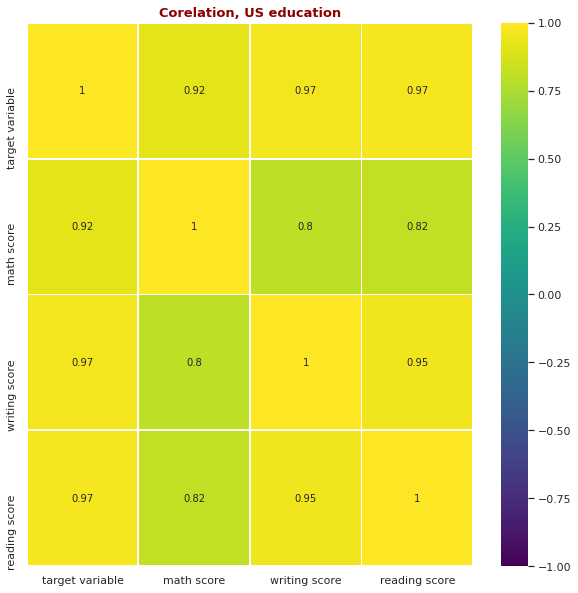

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation, annot=True, linewidths=1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Corelation, US education", fontdict = title_font)